In [ ]:
import sys
sys.path.append("../")  # import path starts with src/

from preprocessing.create_train_test_dicts import build_splits

data = build_splits(val_ratio=0.25) #validation is obtained from train-split 
data.keys()


dict_keys(['train', 'train_numeric', 'val', 'val_numeric', 'test', 'test_numeric'])

In [4]:
train_split = data['train_numeric']
val_split = data['val_numeric']
test_split = data['test_numeric']

train_split.keys()
train_split['angry']
data['train_numeric']['angry'][0]

array([[0.3764706 , 0.38039216, 0.3882353 , ..., 0.1764706 , 0.21568628,
        0.25490198],
       [0.38039216, 0.3882353 , 0.3764706 , ..., 0.18039216, 0.22352941,
        0.2627451 ],
       [0.37254903, 0.38431373, 0.3764706 , ..., 0.18039216, 0.22352941,
        0.25882354],
       ...,
       [0.1764706 , 0.13333334, 0.13725491, ..., 0.18431373, 0.23137255,
        0.25882354],
       [0.1764706 , 0.15294118, 0.12941177, ..., 0.18431373, 0.22745098,
        0.25490198],
       [0.16470589, 0.15686275, 0.12941177, ..., 0.1882353 , 0.22745098,
        0.25490198]], shape=(48, 48), dtype=float32)

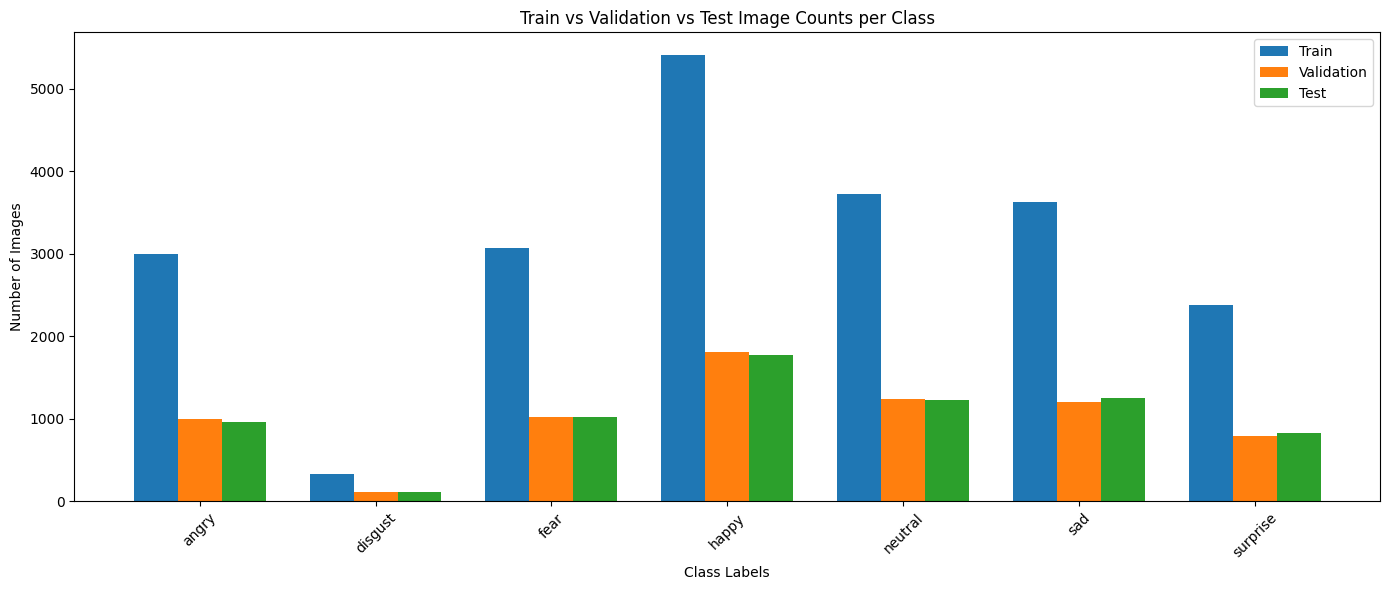

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# --- Compute counts ---
train_counts = {cls: len(files) for cls, files in train_split.items()}
val_counts   = {cls: len(files) for cls, files in val_split.items()}
test_counts  = {cls: len(files) for cls, files in test_split.items()}

labels = list(train_counts.keys())

train_values = [train_counts[l] for l in labels]
val_values   = [val_counts[l]   for l in labels]
test_values  = [test_counts[l]  for l in labels]

x = np.arange(len(labels))  # label positions
width = 0.25                # narrower since 3 bars per group

plt.figure(figsize=(14, 6))

plt.bar(x - width, train_values, width, label='Train')
plt.bar(x,         val_values,   width, label='Validation')
plt.bar(x + width, test_values,  width, label='Test')

plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Train vs Validation vs Test Image Counts per Class")

plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


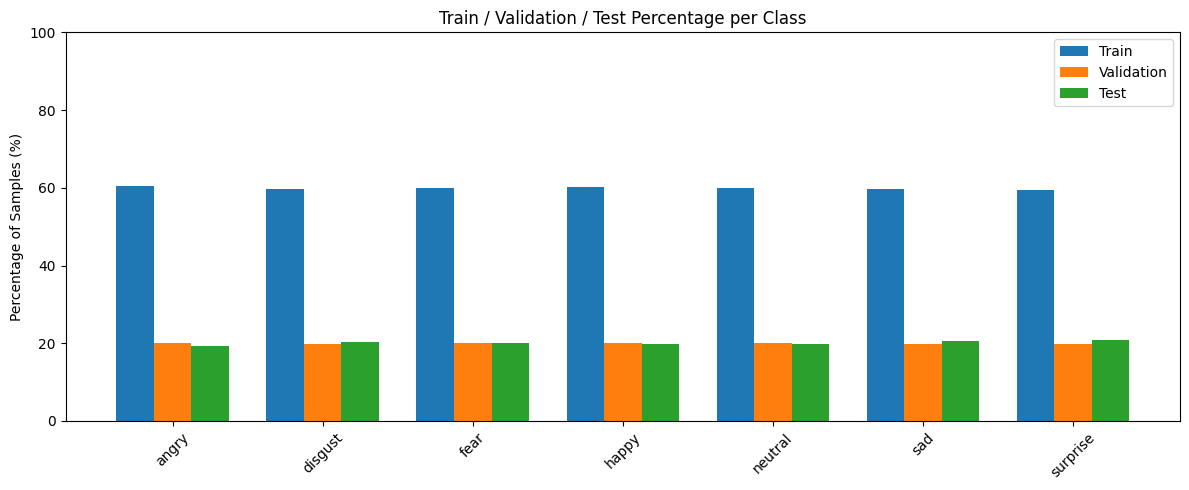

In [6]:
labels = list(train_counts.keys())

# --- compute percentages per split ---
percent_train = {}
percent_val = {}
percent_test = {}

for cls in labels:
    total = train_counts[cls] + val_counts[cls] + test_counts[cls]
    percent_train[cls] = train_counts[cls] / total * 100
    percent_val[cls]   = val_counts[cls]   / total * 100
    percent_test[cls]  = test_counts[cls]  / total * 100

# Prepare data for plotting
train_vals = [percent_train[cls] for cls in labels]
val_vals   = [percent_val[cls]   for cls in labels]
test_vals  = [percent_test[cls]  for cls in labels]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 5))

plt.bar(x - width, train_vals, width, label="Train")
plt.bar(x,         val_vals,   width, label="Validation")
plt.bar(x + width, test_vals,  width, label="Test")

plt.ylabel("Percentage of Samples (%)")
plt.title("Train / Validation / Test Percentage per Class")
plt.ylim(0, 100)
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
